Salary Prediction System

D:\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Welcome to Salary Prediction System
Press ENTER key to proceed

0 ... Salary_Prediction.csv
Select file to create ML model : 0
Salary_Prediction.csv is selected
Reading csv file
Creating Dataset
Dataset created
Enter test data size (between 0 and 1) : 0.2
Model creation in progression
Model is created
Press ENTER key to predict test data in trained model

[[ 9.5]
 [ 4.1]
 [ 3.7]
 [10.3]
 [ 8.7]
 [ 2.2]]  ... [116969  57081  57189 122391 109431  39891]  ... [115174.99105708  65407.16994599  61720.6646785  122548.00159205
 107801.9805221   47896.26992542]
[9.5] ... 116969 ... 115174.99105707779
[4.1] ... 57081 ... 65407.169945992064
[3.7] ... 57189 ... 61720.66467850424
[10.3] ... 122391 ... 122548.00159205345
[8.7] ... 109431 ... 107801.98052210212
[2.2] ... 39891 ... 47896.26992542487
Press ENTER key to see above result in graphical format



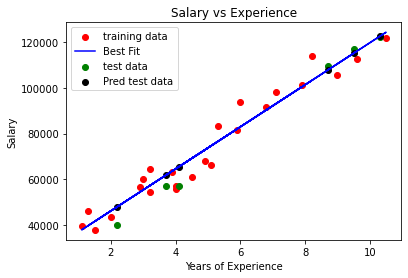

Our model is 97.58% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, seperated by comma : 
5,8.2


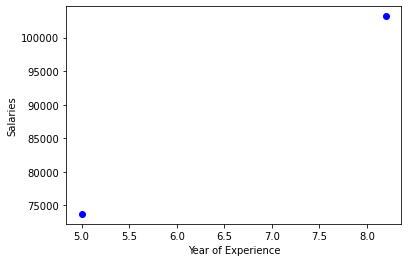

   Experience       Salaries
0         5.0   73701.806798
1         8.2  103193.848938

Press ENTER key to end



In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #Importing the r2_score function from the sklearn.metrics module for finding r^2
def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to proceed")
    input()
def checkcsv():
    csv_files=[]
    cur_dir=os.getcwd() #(getcwd--get current working directory)
    content_list=os.listdir(cur_dir)
    for x in content_list:
        if x.split('.')[-1]=='csv': 
            csv_files.append(x)
    if len(csv_files)==0:
        return 'No csv file in the directory'
    else:
        return csv_files
def display_and_select_csv(csv_files):
    i=0
    for file_name in csv_files:
        print(i,'...',file_name)
        i+=1
    return csv_files[int(input("Select file to create ML model : "))] #Csv file is selected by the User
def graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred): #Function to plot the training and test data, along with the regression line
    plt.scatter(X_train,Y_train,color='red',label='training data') #Plotting training data points
    plt.plot(X_train,regressionObject.predict(X_train),color='blue',label='Best Fit') #Plotting the Best Fit line
    plt.scatter(X_test,Y_test,color='green',label='test data') #Plotting test data points
    plt.scatter(X_test,Y_pred,color='black',label='Pred test data') #Plotting test and predicted data points
    plt.title("Salary vs Experience") #Adding main title to the graph
    plt.xlabel("Years of Experience") #Adding label to the x-axis
    plt.ylabel("Salary") #Adding label to the y-axis
    plt.legend() #Describes the elements of the graph
    plt.show() #Display the graph
    
def main():
    welcome()
    try:
        csv_file=checkcsv()
        if csv_file== "No csv file in the directory":
            raise FileNotFoundError("No csv file in the directory")
        csv_file=display_and_select_csv(csv_file)
        print(csv_file,'is selected')
        print('Reading csv file')
        print('Creating Dataset')
        dataset=pd.read_csv(csv_file)
        print('Dataset created')
        X=dataset.iloc[:,:-1].values
        Y=dataset.iloc[:,-1].values
        s=float(input('Enter test data size (between 0 and 1) : ') )
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=s)
        print("Model creation in progression")
        regressionObject=LinearRegression()
        regressionObject.fit(X_train,Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()
        
        Y_pred=regressionObject.predict(X_test)
        i=0 #
        print(X_test,' ...',Y_test,' ...',Y_pred) #Printing test data, actual salaries, and predicted salaries
        while i<len(X_test): #Loop for picking individual test data
            print(X_test[i],'...',Y_test[i],'...',Y_pred[i]) #Printing individual test data, actual salaries, and predicted salaries
            i+=1 #Moves to the next test data point
        print("Press ENTER key to see above result in graphical format") #Press enter to view result
        input() #Press enter button for going to the next step
        graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred) #Calling the function to plot the training and test data, along with the regression line
        r2=r2_score(Y_test,Y_pred) #Calculating the R-squared score
        print("Our model is %2.2f%% accurate" %(r2*100)) #Prints the accuracy of the model
        
        print("Now you can predict salary of an employee using our model") #Model is ready for salary prediction based on experience
        print("\nEnter experience in years of the candidates, seperated by comma : ") #Enter year for getting the salary based on experience
        
        exp=[float(e) for e in input().split(',')] #Values of experience entered with commas are seperated and stored in a list named exp 
        ex=[] #Empty list
        for x in exp: #Picking values individually from exp
            ex.append([x]) #Appending each experience value to the 'ex' list as a sublist
        experience = np.array(ex)#Creating a NumPy array 'experience' from the list 'ex'
        salaries=regressionObject.predict(experience) #Prdict salary based on experience
        plt.scatter(experience,salaries,color='blue') #Plots the points on the graph 
        plt.xlabel('Year of Experience') #x-axis is named as "Year of Experience"
        plt.ylabel('Salaries') #y-axis is named as "Salaries"
        plt.show() #plots and shows the graph of "Year of experience" and "Salaries"
        d=pd.DataFrame({'Experience':exp,'Salaries':salaries}) #Creating a DataFrame with predicted salaries
        print(d) #Prints the salaries generated by the ML model based on expeirnce
        print("\nPress ENTER key to end")
    
    except FileNotFoundError:
        print("No csv file in the directory")
        print("Press ENTER key to exit") # Ends the program after the User press enter
        input() # Enter is inputed
        exit() # Program ends
        
if __name__=="__main__":
    main()
    input()